In [1]:
#1)What options are available to the user in the given Python code for analyzing placement data, 
#and how does the code facilitate actions such as printing the original dataset, 
#sorting data by year or package, and identifying companies with the highest or lowest number of job offers?

import pandas as pd

def print_original_dataset():
    print("\nOriginal Dataset:")
    print(df)
    print()

def sort_by_year_high_to_low():
    sorted_df = df.sort_values(by='Year', ascending=False)
    print("\nSorted by Year (High to Low):")
    print(sorted_df)
    print()

def sort_by_package_low_to_high():
    sorted_df = df.sort_values(by='Package (LPA)')
    print("\nSorted by Package (Low to High):")
    print(sorted_df)
    print()

def sort_by_package_high_to_low():
    sorted_df = df.sort_values(by='Package (LPA)', ascending=False)
    print("\nSorted by Package (High to Low):")
    print(sorted_df)
    print()

def highest_offers_company():
    company = df.loc[df['Offers'].idxmax()]
    print("\nCompany with the Highest Number of Offers:")
    print(company)
    print()

def lowest_offers_company():
    company = df.loc[df['Offers'].idxmin()]
    print("\nCompany with the Lowest Number of Offers:")
    print(company)
    print()

df = pd.read_csv('placementData.csv', na_values=['NA', 'missing'])

print("Select an option:")
print("1. Print Original Dataset")
print("2. Sort by Year (High to Low)")
print("3. Sort by Package (Low to High)")
print("4. Sort by Package (High to Low)")
print("5. Company with Highest Number of Offers")
print("6. Company with Lowest Number of Offers")

choice = int(input("Enter your choice (1-6): "))
match choice:
    case 1:
        print_original_dataset()
    case 2:
        sort_by_year_high_to_low()
    case 3:
        sort_by_package_low_to_high()
    case 4:
        sort_by_package_high_to_low()
    case 5:
        highest_offers_company()
    case 6:
        lowest_offers_company()
    case _:
        print("Invalid choice. Please enter a number between 1 and 6.")


Select an option:
1. Print Original Dataset
2. Sort by Year (High to Low)
3. Sort by Package (Low to High)
4. Sort by Package (High to Low)
5. Company with Highest Number of Offers
6. Company with Lowest Number of Offers


Enter your choice (1-6):  1



Original Dataset:
     Year                                   Company  Offers    Package
0    2022                               Service Now       1  33.59 LPA
1    2022                          Gojek Technology       1     32 LPA
2    2022             Fivetran Enterprise Solutions       4     25 LPA
3    2022        Nutanix Technologies India Pvt Ltd       2  21.96 LPA
4    2022  Amazon Development Centre India Pvt Ltd.      20     20 LPA
..    ...                                       ...     ...        ...
177  2023             Techture Structures Pvt. Ltd.       3   3.69 LPA
178  2023                               Chegg India      20    3.6 LPA
179  2023                                Techwalnut       2    3.6 LPA
180  2023                                Tata Elxsi      10    3.5 LPA
181  2023                                 TCS Ninja     124   3.36 LPA

[182 rows x 4 columns]



In [2]:
#2)What are the companies with job offers and packages falling within a 
#user-specified salary range, considering the provided Python code that reads 
#placement data from a CSV file and filters companies based on their offer packages?


import re 

user_input = float(input("Enter the LPA: "))

def extract_numeric(package_str):
    match = re.search(r'\d+(\.\d+)?', package_str)
    return float(match.group()) if match else None

upper_limit = user_input + 0.9

filtered_data = df[(df['Package'].apply(lambda x: extract_numeric(str(x))) >= user_input) &
                   (df['Package'].apply(lambda x: extract_numeric(str(x))) <= upper_limit)]

if not filtered_data.empty:
    sorted_data = filtered_data.sort_values(by='Offers', ascending=False)

    print("\nList of companies with offers in the range {} LPA to {} LPA:".format(user_input, upper_limit))
    for _, row in sorted_data.iterrows():
        print("Company: {}, Offers: {}, Package: {}".format(row['Company'], row['Offers'], row['Package']))
else:
    print("No Companies with offers in the range {} LPA to {} LPA found.".format(user_input, upper_limit))

Enter the LPA:  2


No Companies with offers in the range 2.0 LPA to 2.9 LPA found.


Original Dataset:
   Year  Total_Offers      Highest_Package         Selection  \
0  2023          1620       48LPA Fivetran  325 in Capgemini   
1  2022          1800   33.6LPA ServiceNow  347 in Cognizant   
2  2021          1504  23LPA Goldman Sachs  213 in Cognizant   
3  2020          1429        20 LPA Amazon  324 in Accenture   

  Average_Salary_IT Average_Salary_Circuit Average_Salary_Core  
0           9.8 LPA                6.2 LPA             5.7 LPA  
1           9.2 LPA                6.3 LPA             5.1 LPA  
2           6.5 LPA                    NaN                 NaN  
3           5.9 LPA                    NaN                 NaN  


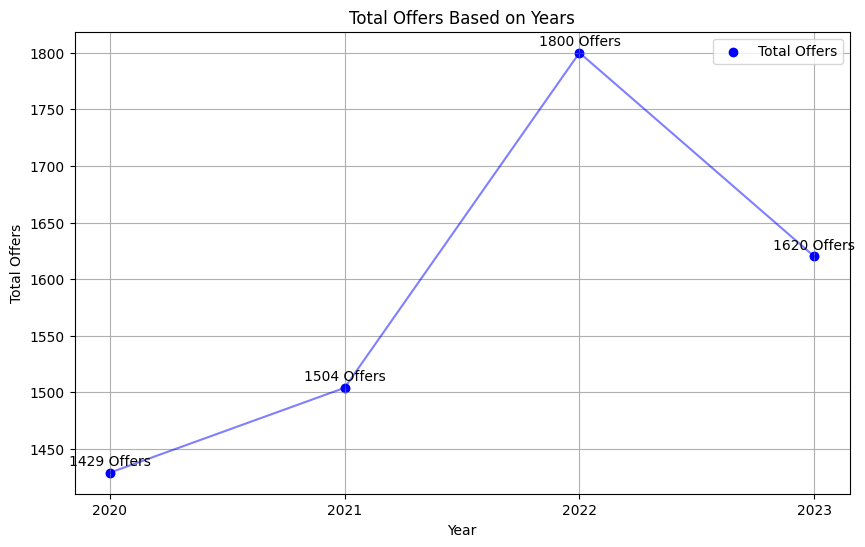

In [3]:
#3)create Data Visualization of dataset

import matplotlib.pyplot as plt

placement_data = pd.read_csv('placement2.csv')

print("Original Dataset:")
print(placement_data)

placement_data['Total_Offers'] = pd.to_numeric(
    placement_data['Total_Offers'].astype(str).str.replace('LPA', ''),
    errors='coerce'
)

plt.figure(figsize=(10, 6))

lt.scatter(placement_data['Year'], placement_data['Total_Offers'], color='blue', label='Total Offers')

plt.plot(placement_data['Year'], placement_data['Total_Offers'], linestyle='-', marker='o', color='blue', alpha=0.5)

for i, value in enumerate(placement_data['Total_Offers']):
    plt.annotate(f"{value} Offers", (placement_data['Year'][i], value), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xticks(placement_data['Year'].astype(int))

plt.title('Total Offers Based on Years')
plt.xlabel('Year')
plt.ylabel('Total Offers')
plt.legend()
plt.grid(True)
plt.show()

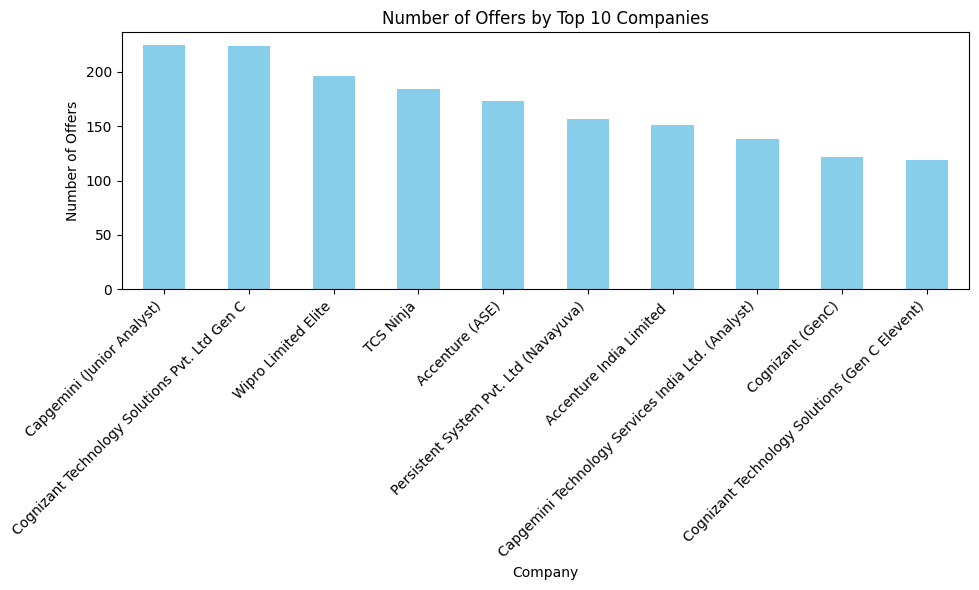

In [4]:
#4)Plot a bar chart showing the number of offers made by the top 10 companies.
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\ASUS\Documents\Python/placementData.csv'

data = pd.read_csv(file_path)

company_offers = data.groupby('Company')['Offers'].sum().sort_values(ascending=False)

top_10_companies = company_offers.head(10)

plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', color='skyblue')
plt.title('Number of Offers by Top 10 Companies')
plt.xlabel('Company')
plt.ylabel('Number of Offers')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()



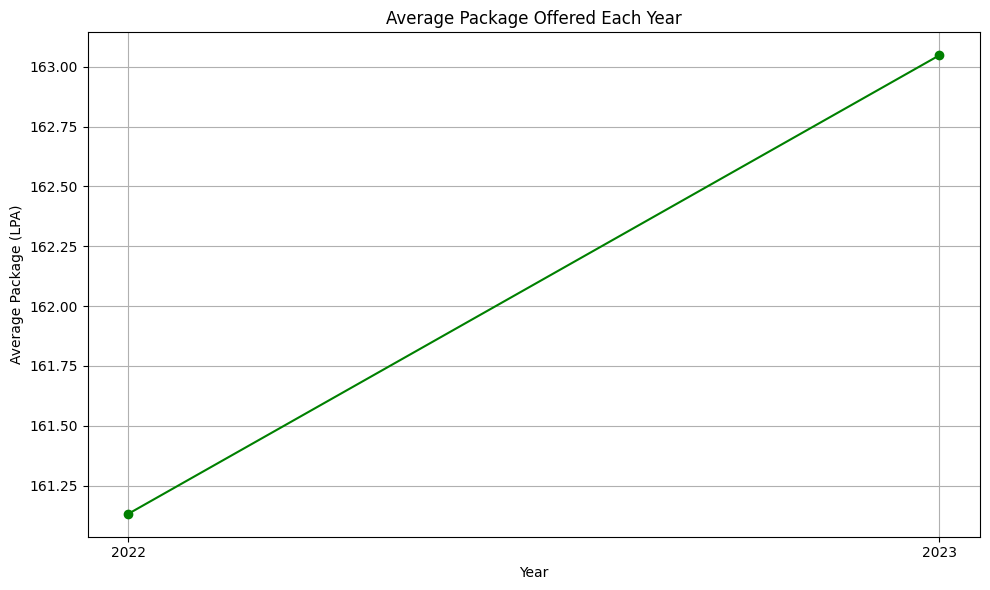

In [5]:
#5)Plot a line chart to compare the average package offered each year.


import pandas as pd
import matplotlib.pyplot as plt

def extract_numeric(package_str):
    numeric_part = ''.join(filter(str.isdigit, package_str))
    try:
        return float(numeric_part)
    except ValueError:
        return None

data['NumericPackage'] = data['Package'].apply(extract_numeric)

data = data.dropna(subset=['NumericPackage'])

average_package_per_year = data.groupby('Year')['NumericPackage'].mean()
plt.figure(figsize=(10, 6))
average_package_per_year.plot(kind='line', marker='o', color='green', linestyle='-')
plt.title('Average Package Offered Each Year')
plt.xlabel('Year')
plt.ylabel('Average Package (LPA)')
plt.xticks(average_package_per_year.index) 
plt.grid(True)
plt.tight_layout()
plt.show()



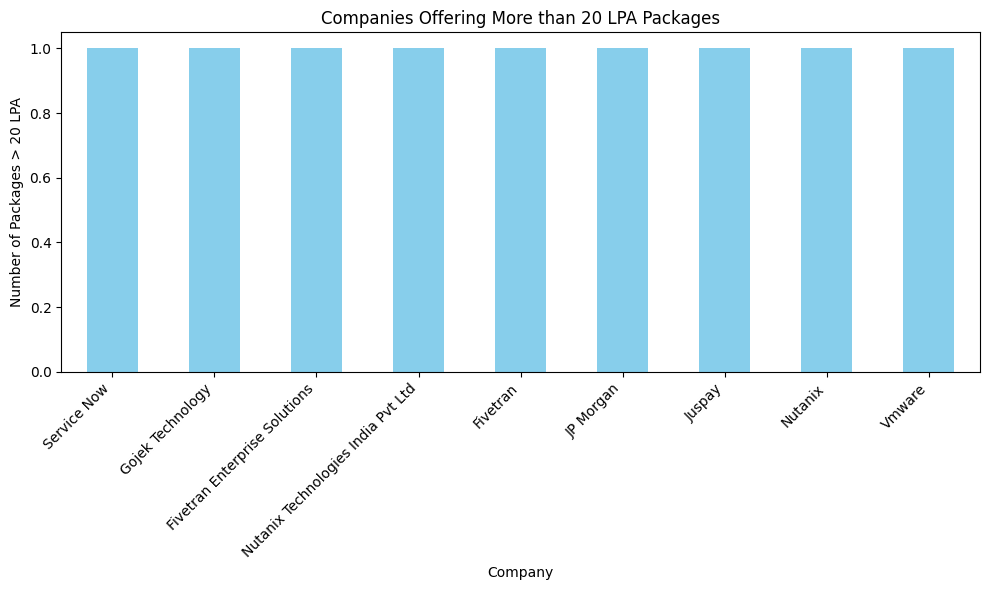

In [6]:
#6)What are the companies that offered more than 20 LPA packages?


import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\ASUS\Documents\Python/placementData.csv'

data = pd.read_csv(file_path)

data['Package'] = pd.to_numeric(data['Package'].str.replace(' LPA', ''), errors='coerce')

data = data.dropna(subset=['Package'])

high_package_companies = data[data['Package'] > 20]['Company']

company_counts = high_package_companies.value_counts()

plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='skyblue')
plt.title('Companies Offering More than 20 LPA Packages')
plt.xlabel('Company')
plt.ylabel('Number of Packages > 20 LPA')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()




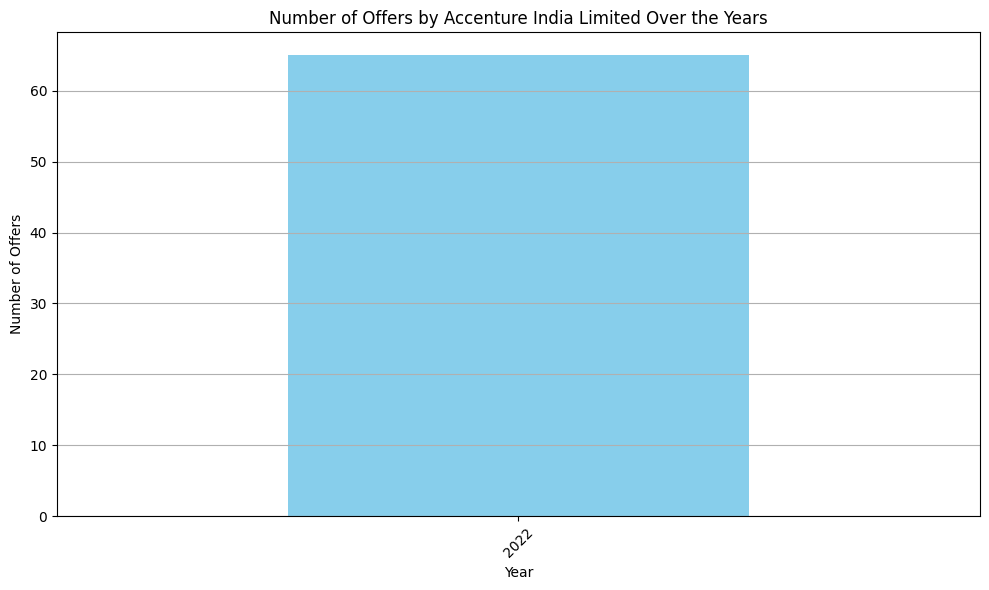

In [7]:
#7)Plot a bar chart displaying the number of offers made by a specific company over the years.

import pandas as pd
import matplotlib.pyplot as plt

company_name = 'Accenture India Limited'

company_data = data[data['Company'] == company_name]

offers_by_year = company_data.groupby('Year')['Offers'].sum()

plt.figure(figsize=(10, 6))
offers_by_year.plot(kind='bar', color='skyblue')
plt.title(f'Number of Offers by {company_name} Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Offers')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4440\2495548061.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Offers', data=avg_offers_by_year, palette='Set2')


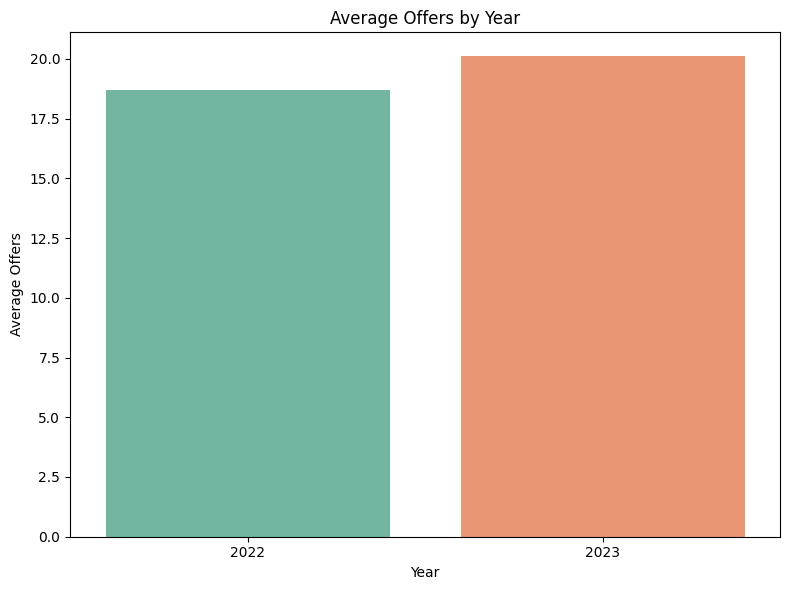

In [8]:
#8)Which year had more offers on average?


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\ASUS\Documents\Python/placementData.csv' 
data = pd.read_csv(file_path)


avg_offers_by_year = data.groupby('Year')['Offers'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Offers', data=avg_offers_by_year, palette='Set2')
plt.title('Average Offers by Year')
plt.xlabel('Year')
plt.ylabel('Average Offers')

plt.tight_layout()
plt.show()



